            Gelir    Mutluluk
count  498.000000  498.000000
mean     4.466902    3.392859
std      1.737527    1.432813
min      1.506275    0.266044
25%      3.006256    2.265864
50%      4.423710    3.472536
75%      5.991913    4.502621
max      7.481521    6.863388
        Gelir  Mutluluk
0    3.862647  2.314489
1    4.979381  3.433490
2    4.923957  4.599373
3    3.214372  2.791114
4    7.196409  5.596398
..        ...       ...
493  5.249209  4.568705
494  3.471799  2.535002
495  6.087610  4.397451
496  3.440847  2.070664
497  4.530545  3.710193

[498 rows x 2 columns]


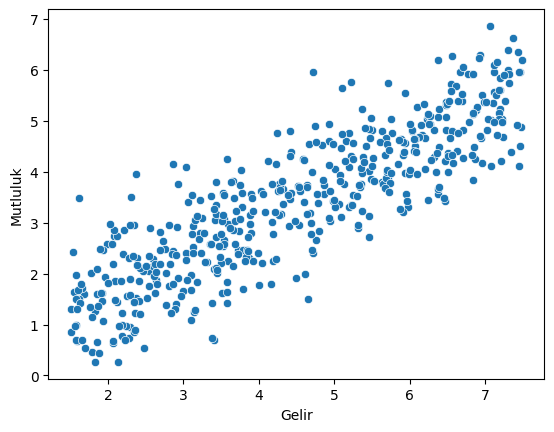

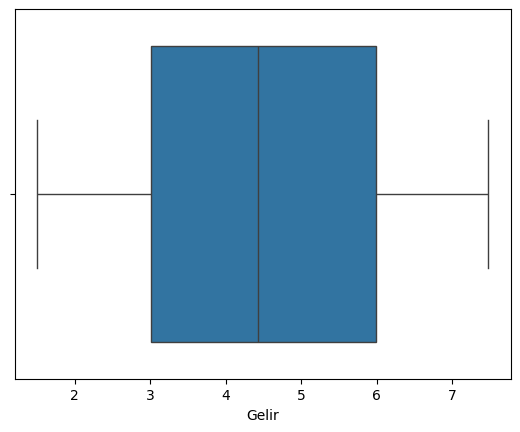

Gelir       0
Mutluluk    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:               Mutluluk   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1034.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.00e-106
Time:                        00:23:34   Log-Likelihood:                -378.71
No. Observations:                 349   AIC:                             761.4
Df Residuals:                     347   BIC:                             769.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

AttributeError: 'DataFrame' object has no attribute 'lr_tahminler'

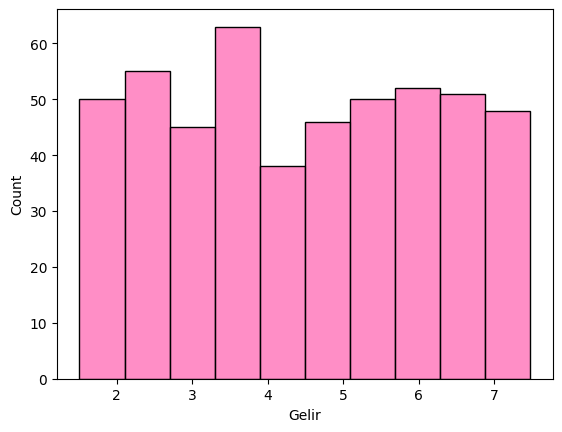

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr


# Veri okuma
veriSeti = pd.read_csv("income.data.csv")
veriSeti.head(6)



# veri ön işleme
#ilk sutunun veri setinden çıkarılması
veriSeti = veriSeti.iloc[:,1:3]

#sütun adlarının değiştirilmesi
veriSeti = veriSeti.rename(columns={"income": "Gelir", "happiness": "Mutluluk"})
print(veriSeti.describe())
print(veriSeti)

#veri setinin grafiklerle incelenmesi
sns.scatterplot(x="Gelir", y="Mutluluk", data=veriSeti)
plt.show()
sns.boxplot(x="Gelir", data=veriSeti)
plt.show()

# veri setindeki aykırı değerlerin incelenmesi
boxplot_stats(veriSeti.Gelir)


# eksik veri kontrolü
print(veriSeti.isnull().sum())

# Nitelikler arasında korelasyonun incelenmesi
pearsonr(veriSeti.Gelir, veriSeti.Mutluluk)

# Hedef niteliğin Gauss dağılımına uygunluğunun incelenmesi
sns.histplot(data=veriSeti, x="Gelir", color="hotpink")

# EĞİTİM VE TEST VERİ SETİNİN OLUŞTURULMASI
egitim = veriSeti.sample(frac = 0.7, replace = False, random_state= 1)
ind = veriSeti.index.isin(egitim.index)
test = veriSeti[~ind]

# regresyon modelinin oluşturulması
lr_model = smf.ols("Mutluluk ~ Gelir", data=egitim).fit()
print(lr_model.summary())

# regresyon katsayilarinin bulunması (coefficients)
print(lr_model.params)

# regresyon denklemi 
# mutluluk = 0.228 + 0.708 * gelir
 
# Modelin iyiliğinin belirlenmesi
r_sq = lr_model.rsquared
print("Modelin R^2 değeri: ", r_sq)

# PERFORMANS DEĞERLENDİRME
lr_tahminler = lr_model.predict(test[['Gelir']])
print("Tahminler: ", lr_tahminler)

performansVerisi = pd.DataFrame(np.column_stack([test.Mutluluk, lr_tahminler]), columns=["Y Test", "Tahmin Mutluluk"])
print(performansVerisi)

# Error Metrics
performansVerisi["error"] = performansVerisi["Y Test"] - performansVerisi["Tahmin Mutluluk"]
performansVerisi.lr_tahminler

# Mean error (ME)
ME = np.sum(performansVerisi.error) / len(performansVerisi)

# Mean Absolute Error (MAE)
MAE = np.sum(np.abs(performansVerisi.error)) / len(performansVerisi)

# Mean Percantage Error (MPE)
MPE = 100 * (np.sum(performansVerisi.error / performansVerisi["Y Test"]) / len(performansVerisi))

# Mean Absolute Percantage Error (MAPE)
MAPE = 100 * (np.sum(np.abs(performansVerisi.error) / performansVerisi["Y Test"]) / len(performansVerisi))

# Mean Squared Error (MSE)
MSE = np.sum(pow(performansVerisi.error, 2)) / len(performansVerisi)

# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)

# sklearn.metrics'teki hazır fonksiyonlar ile performans tahmini
mae = mean_absolute_error(y_true= test.Mutluluk, y_pred = lr_tahminler)

mse = mean_squared_error(y_true= test.Mutluluk, y_pred = lr_tahminler)

rmse = mean_squared_error(y_true= test.Mutluluk, y_pred = lr_tahminler, squared=False)

# REGRESYON DOĞRUSUNUN ÇİZİMİ   
plt.scatter(test.Gelir, test.Mutluluk, color="blue")
plt.plot(test.Gelir, lr_tahminler, color="red", linewidth=3)







